In [6]:
# Train the classifiers with a K-Fold Cross Validation and perform feature selection
# using a Univariate feature selection

In [7]:
import pandas as pd
df = pd.read_csv('../data/dataset_rebalanced.csv')

In [8]:
df = df.replace({'Positive': 0, 'Negative': 1})

In [9]:
X = df.iloc[:,:-1]
y = pd.DataFrame(df['Sentiment'])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [181 193 211 255 273 424 532 697 806] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

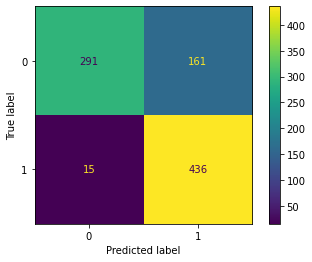

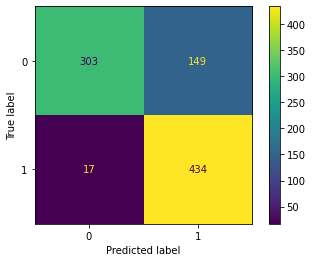

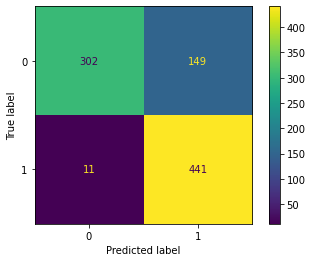

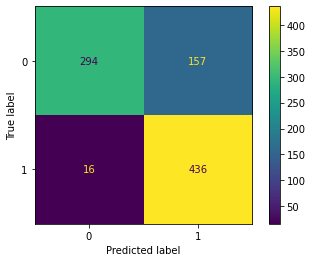

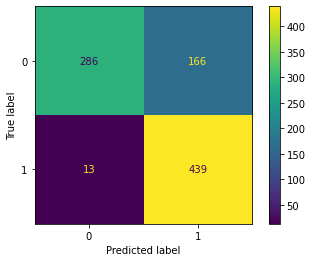

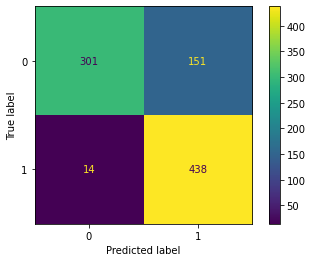

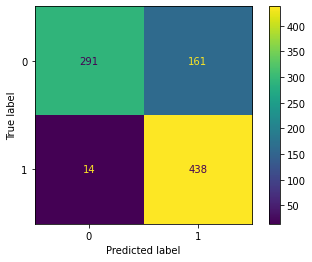

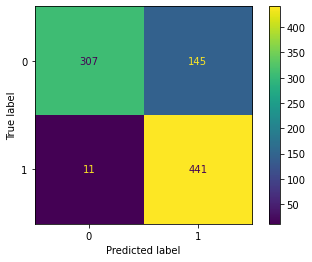

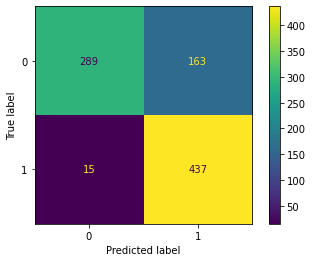

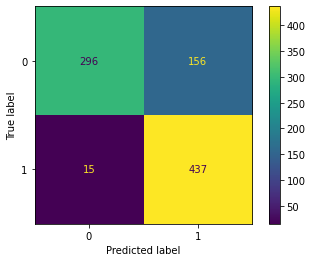

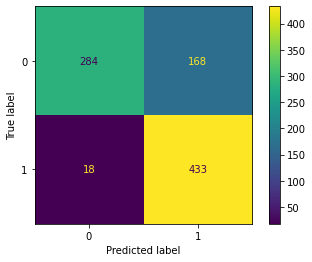

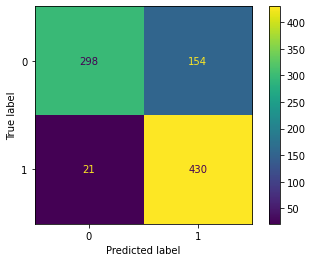

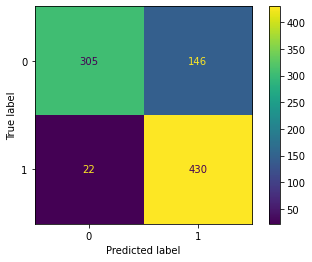

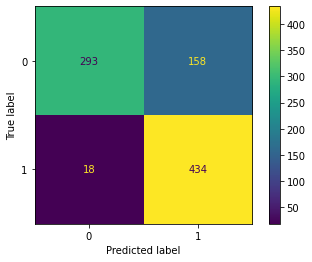

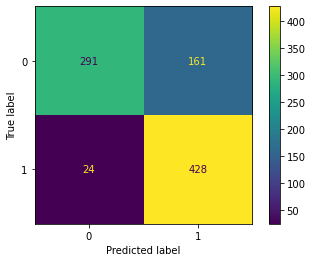

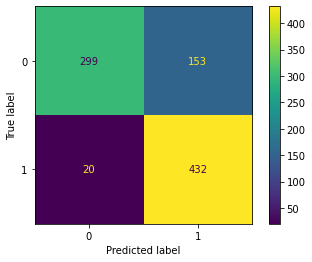

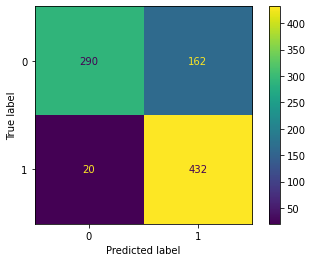

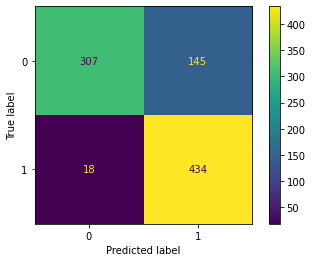

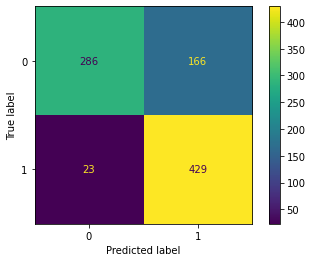

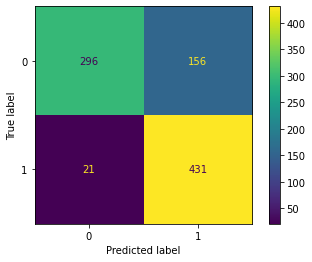

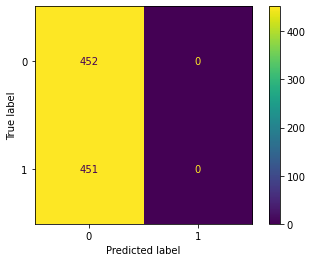

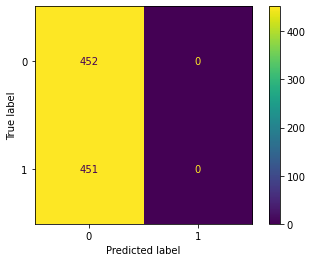

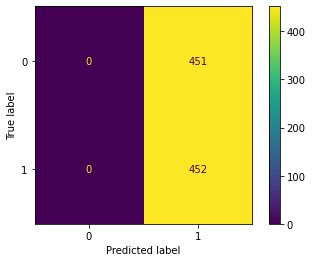

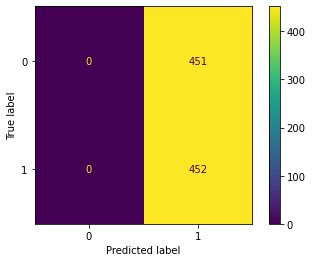

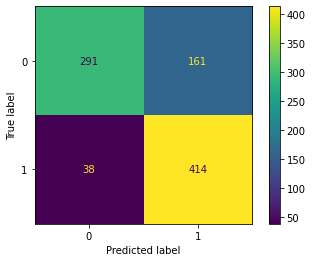

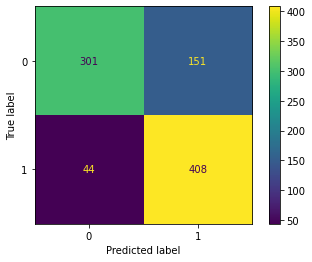

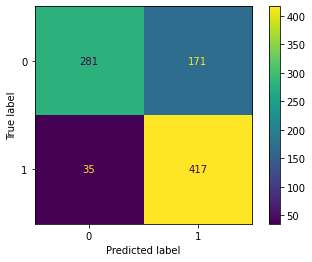

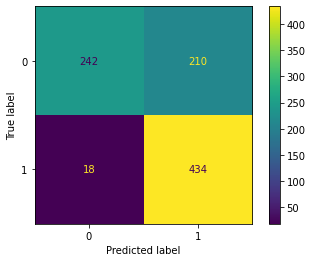

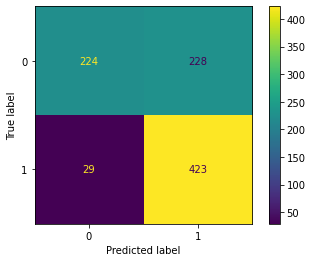

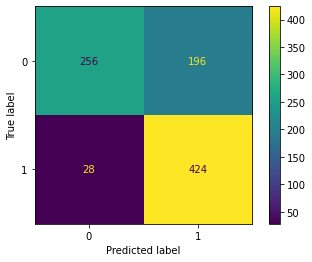

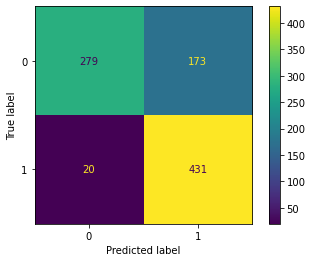

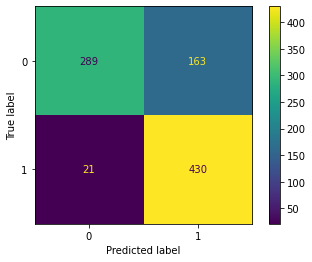

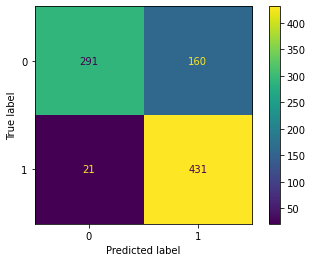

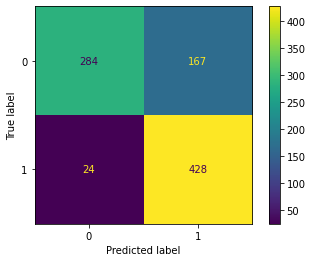

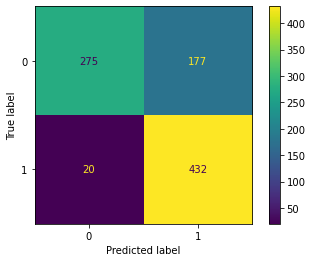

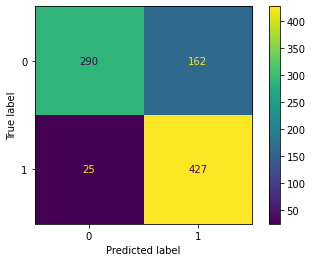

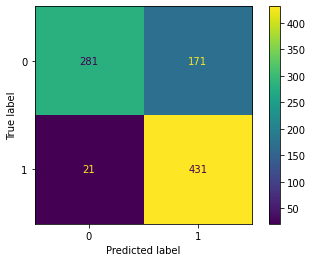

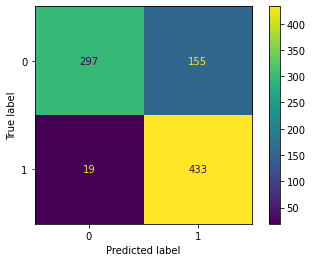

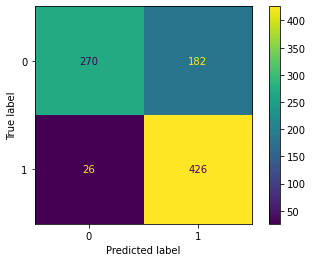

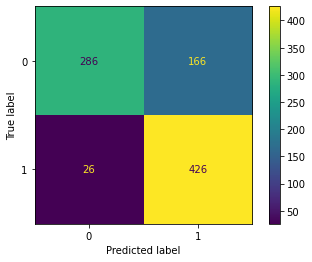

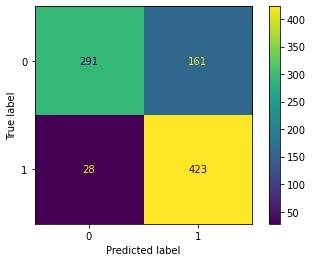

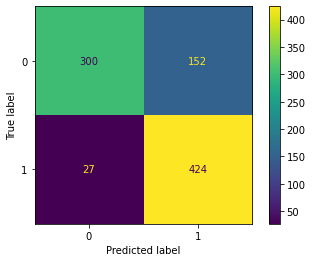

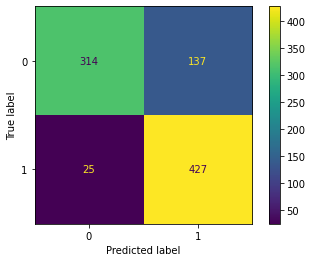

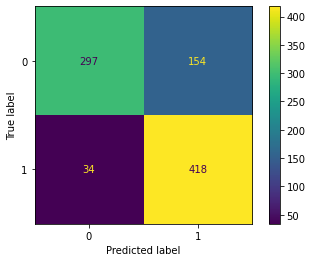

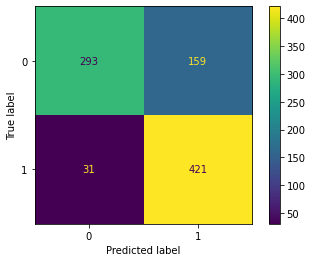

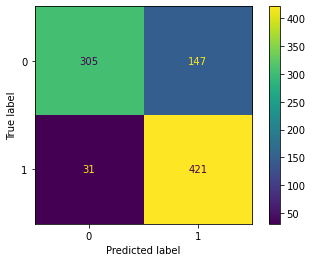

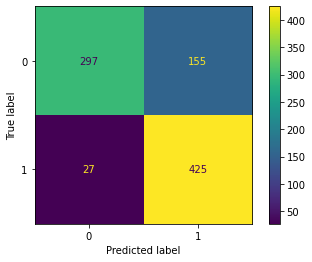

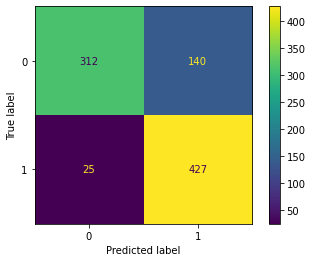

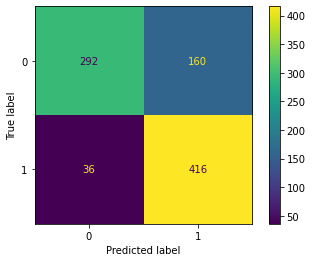

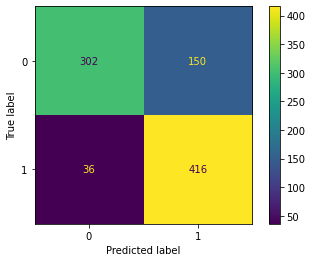

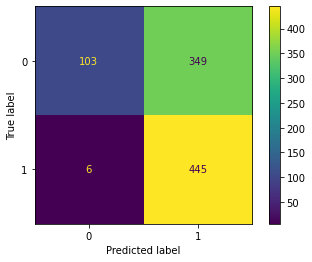

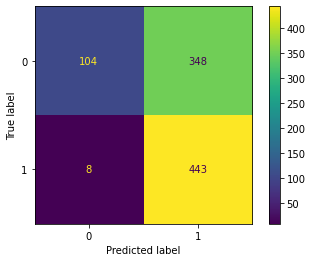

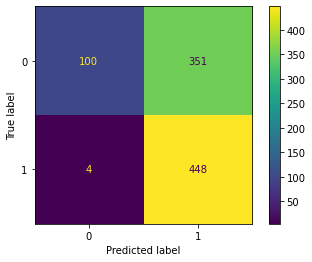

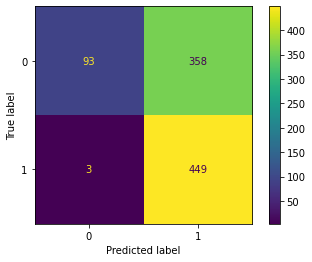

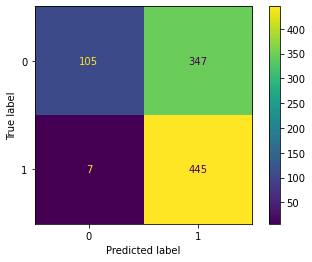

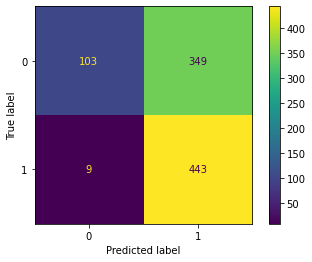

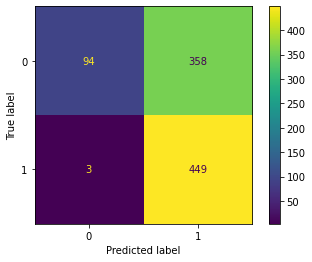

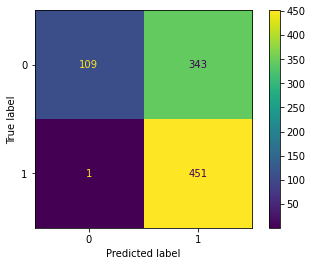

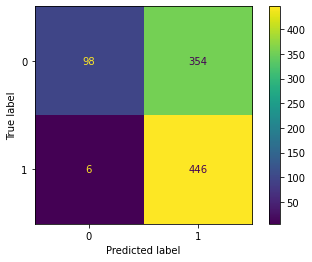

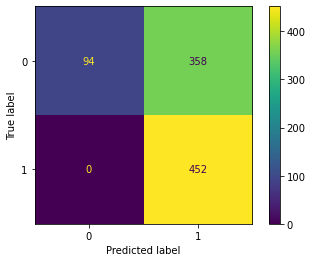

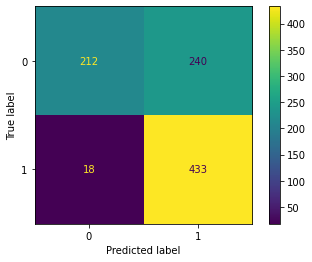

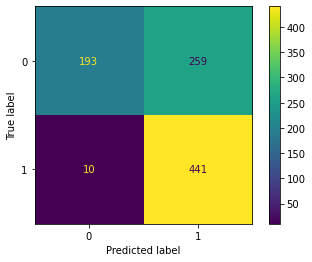

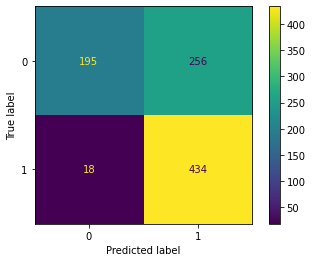

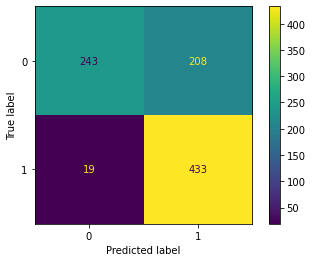

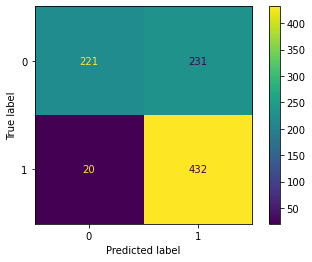

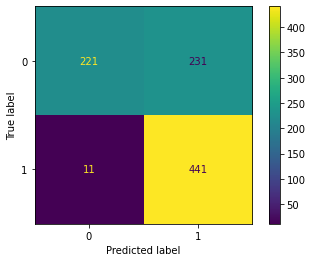

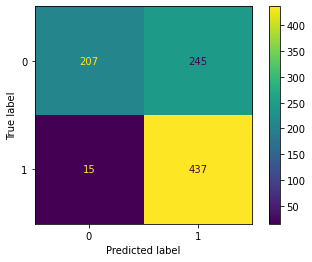

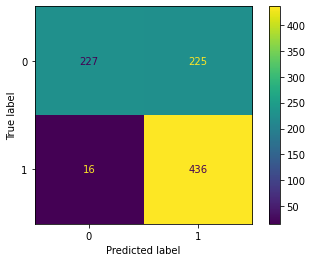

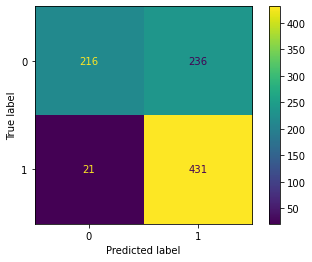

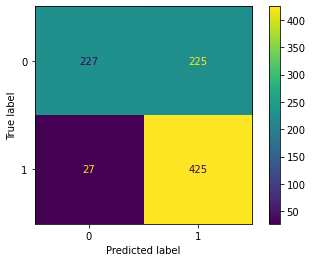

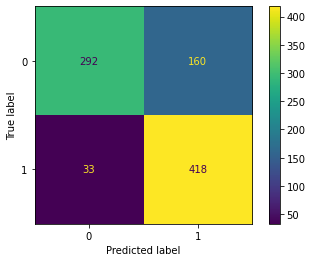

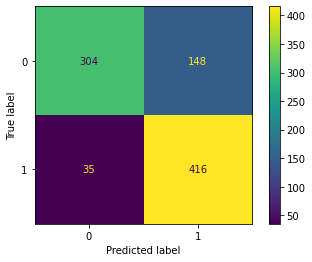

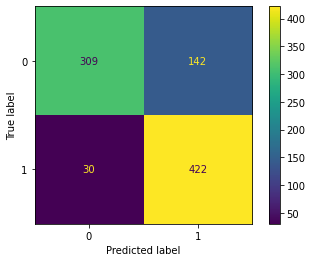

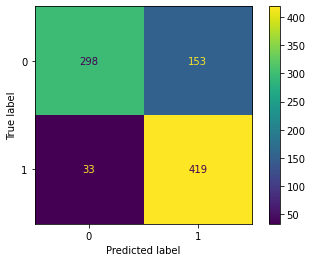

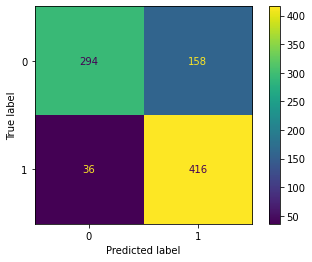

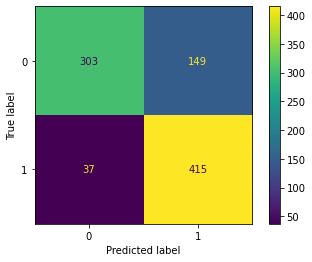

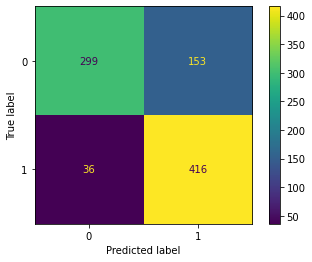

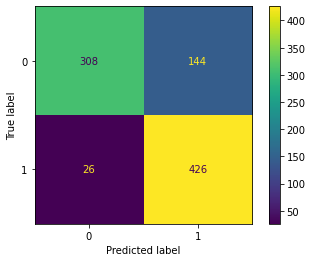

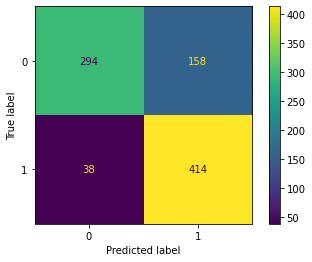

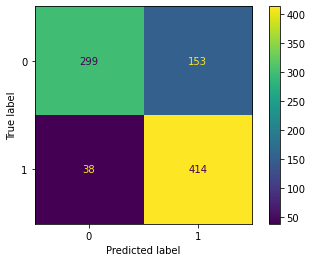

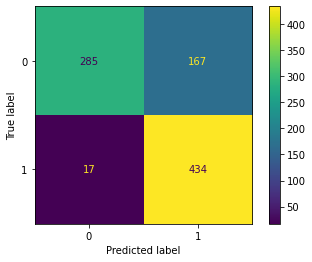

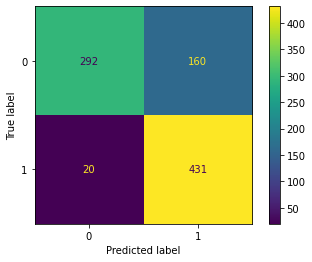

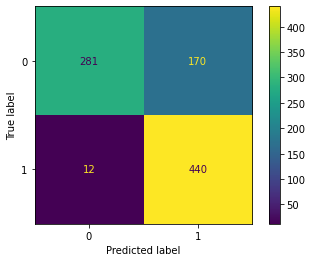

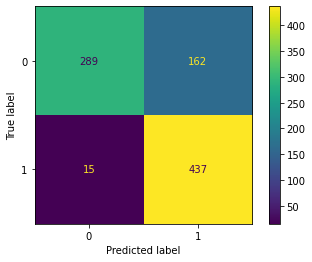

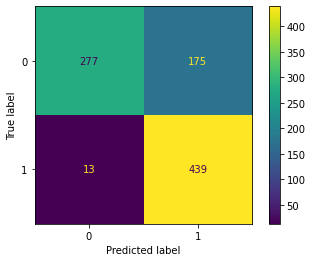

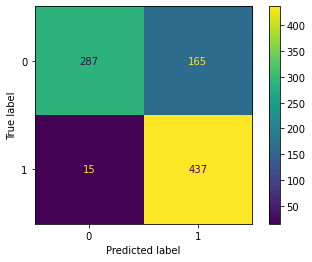

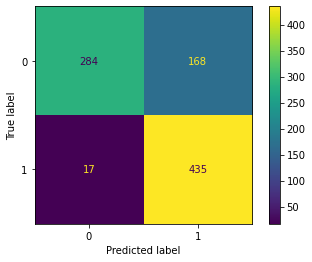

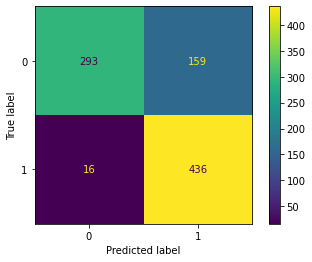

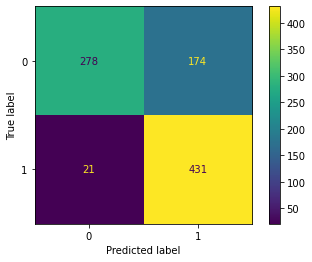

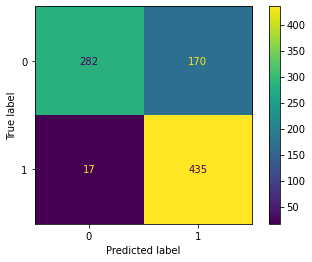

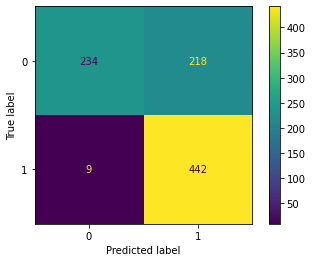

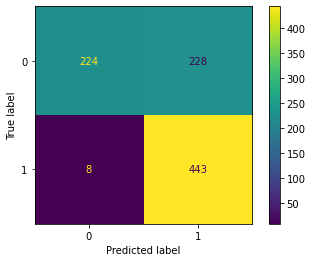

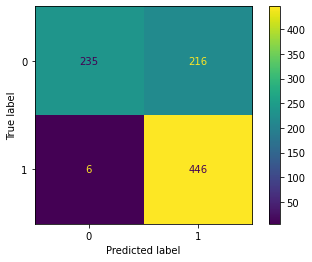

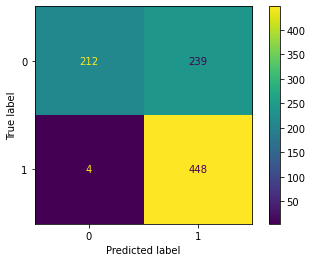

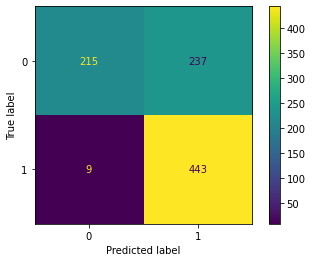

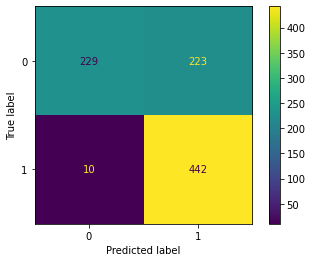

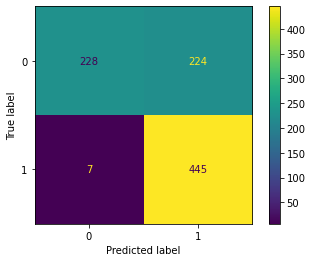

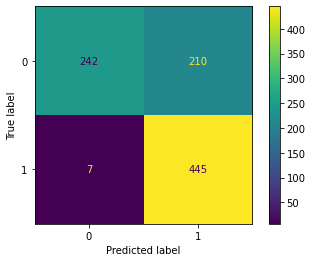

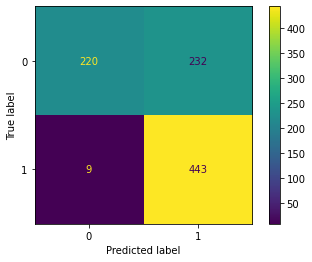

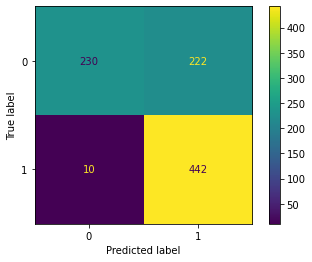

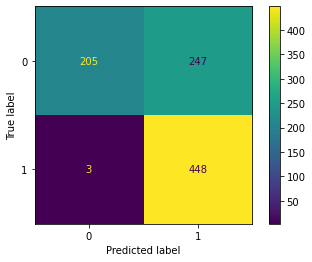

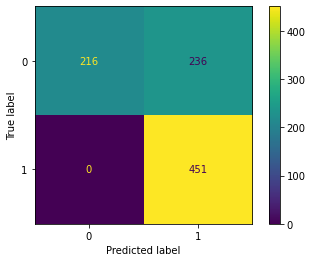

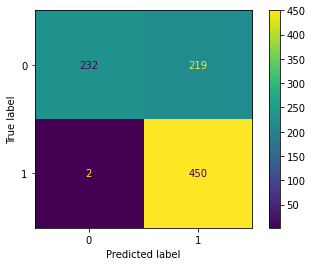

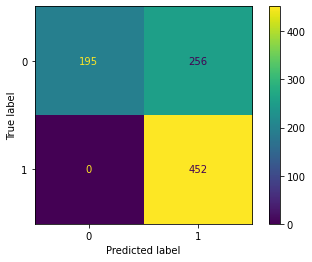

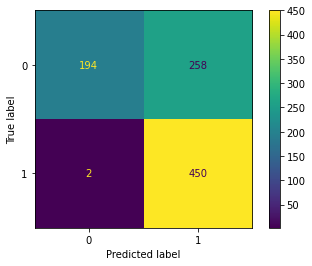

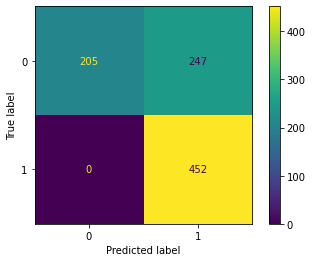

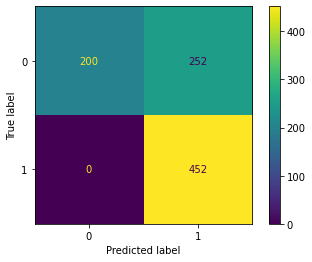

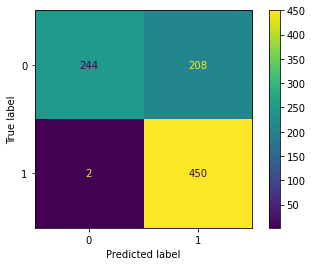

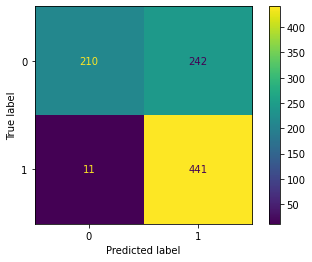

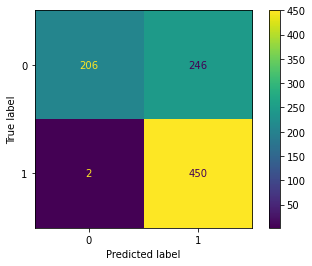

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

names = [
    "Gradient Boosting",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


def training(train, name, test, fold_no, model, y_train, y_test):
    x_train = train
    x_test = test
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    plot_confusion_matrix(model, x_train,y_train)
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = pd.DataFrame(df.iloc[2,:]).transpose()
    df2 = pd.DataFrame()
    df2['Accuracy'] = df['precision']
    df2['Algorithm'] = name
    df2['FoldNo'] = fold_no
    df2.to_csv('classification_report.csv', mode='a', header=False,index = False)


for name, clf in zip(names, classifiers):
    skf = StratifiedKFold(n_splits=10)
    fold_no = 1
    for train_index,test_index in skf.split(X, y):
        train = X.iloc[train_index,:]
        test = X.iloc[test_index,:]
        y_train = y.iloc[train_index,:]
        y_test = y.iloc[test_index,:]
        selector = SelectKBest(f_classif, k=4)
        selector.fit(train, y_train)
        scores = -np.log10(selector.pvalues_)
        scores[np.isnan(scores)] = 0
        scores = scores / scores.max()
        train = train.loc[:,train.columns[scores>=0.3]]
        test = test[train.columns.values.tolist()]
        training(train,name, test,fold_no, clf,y_train,y_test)
        fold_no += 1

In [11]:
df = pd.read_csv('../data/dataset_rebalanced.csv')
df = df.replace({'Positive': 0, 'Negative': 1})
X = df.iloc[:, :-1]
y = pd.DataFrame(df['Sentiment'])

In [12]:
import pickle
model = GaussianProcessClassifier(1.0 * RBF(1.0))
selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores[np.isnan(scores)] = 0
scores = scores / scores.max()
X = X.loc[:,X.columns[scores>=0.3]]
model = model.fit(X, y)

# save the trained model to the disk
filename = 'GaussianProcess.pkl'
pickle.dump(model, open(filename, 'wb'))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
